##Sentiment analysis of public opinion on the Tren Maya proyect

### Crisp - Dm Methodology

###Data mining, Universidad Politecnica de Yucatan

Student: Juan JOse Tec Tun
Professor : Victor Alejandro Ortiz Santiago


# 1. Business Understanding

## Objectives:

*  Identify Success Factors: Determine which elements, such as genre, cast, director, etc. They are common in the most successful films.
*  Predict the Success of Future Films: Use the data collected to develop predictive models that can estimate the potential success of new productions.
*  Optimize Marketing Strategies: Identify which aspects of the films resonate most with the public to focus marketing campaigns.
*  Improve Decision Making in Productions: Provide producers and film studios with valuable information that can influence future decisions about film projects.

## Business context:

This analysis would be invaluable to producers, distributors, and streaming platforms to better understand what viewers are looking for and how box office revenue and subscriptions can be maximized. Additionally, it can help in decision making for future productions and marketing strategies.

This project would require skills in data analysis, and possibly machine learning, along with a deep understanding of the film market.
## Project plan:

1.   Data acquisition
2.   Preprocessing
3.   Sentiment Analysis
5.   Visualization

# 2. Data Understanding

## Data collection:

To begin data collection, I had to look for movie scripts and transfer them to a CSV format for later analysis. This made it a little complicated for us, but the advantage is that now our data is clean and we only have the dialogues.

## Exploratory data analysis:

In [33]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import probplot
# load libraries before using any function
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pylab
import scipy.stats as stats
import re
import string


In [34]:
#LOAD DATA
df = pd.read_csv('Avatar1.1.csv', index_col=0)
# view the firt few rows
df.head()


,Dialogos
"Character,",
"JAKE,","They can fix a spinal, if you?ve got\nthe mone..."
"PERKY,","The Bengal tiger, extinct for over a\ncentury,..."
"JAKE,",I became a Marine for the hardship.\nTo be ham...
"JAKE,",If it ain?t rainin? we ain?t trainin
"AGENT 1,",Are you Jake Sully?


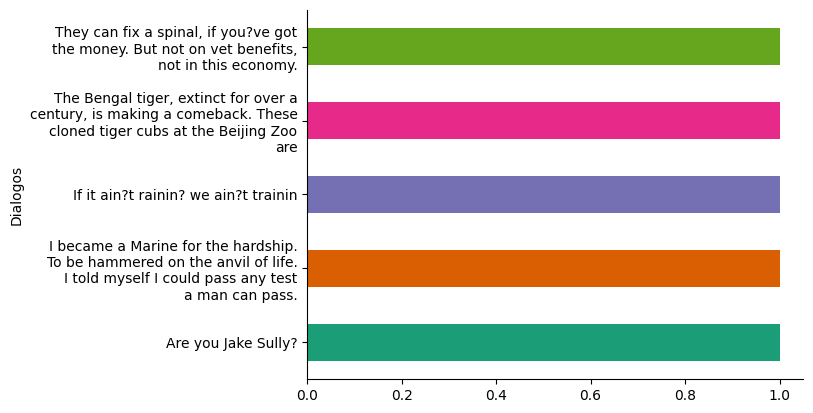

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Dialogos').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
# Descriptive statistics
df.describe()

,Dialogos
count,281
unique,279
top,That?s it. Find your way home.
freq,2


In [37]:
# Missing Values
df.isnull().sum()

Dialogos    0
dtype: int64

# 3. Data Preparation

## Data cleaning & Data transformation:

Data cleaning is crucial in preparing text data, especially from social media, for analysis. The clean_tweet function in this code performs the following steps:

1. Dialogs = re.sub(r'^RT[\s]+', '', Dialogs)
This line removes the "RT" pattern from the beginning of a text string. "RT" usually indicates a retweet on Twitter, followed by one or more spaces. The regular expression ^RT[\s]+ looks for "RT" only at the beginning of the string (^ indicates the start of the string) followed by one or more spaces ([\s]+).

2. Dialogues = re.sub(r'https?:\/\/.*[\r\n]*', '', Dialogues)
This line removes URLs from a text. The regular expression https?:\/\/.*[\r\n]* searches for any string that begins with "http://" or "https://" followed by any character (.*) to the end of the line, including possible carriage return characters or new lines ([\r\n]*).


3. Dialogs = re.sub(r'#', '', Dialogs)
This line removes the "#" number symbol from the text. It is common to use it to mark hashtags on social networks like Twitter. Here, only the “#” symbol is removed, but not the text that follows it.

4. Dialogues = re.sub(r'@[A-Za-z0-9]+', '', Dialogues)
This line is designed to eliminate user mentions on social networks, which usually begin with "@". The regular expression @[A-Za-z0-9]+ searches for a string that begins with "@" followed by one or more alphanumeric characters (upper and lower case letters and numbers).

In [38]:

def clean_text(Dialogos):
  Dialogos = re.sub(r'^RT[\s]+', '', Dialogos)
  Dialogos = re.sub(r'https?:\/\/.*[\r\n]*', '', Dialogos)
  Dialogos = re.sub(r'#', '', Dialogos)
  Dialogos = re.sub(r'@[A-Za-z0-9]+', '', Dialogos)
  return Dialogos


In [39]:
df['clean_text'] = df['Dialogos'].apply(clean_text)


In [40]:
df['clean_text']


Character,
JAKE,       They can fix a spinal, if you?ve got\nthe mone...
PERKY,      The Bengal tiger, extinct for over a\ncentury,...
JAKE,       I became a Marine for the hardship.\nTo be ham...
JAKE,                    If it ain?t rainin? we ain?t trainin
AGENT 1,                                  Are you Jake Sully?
                                  ...                        
JAKE,       I made a kill today. We ate it. I\nknow where ...
GRACE,       Other body. You need to take care of\nthis body.
GRACE,      Jake, I?m serious -- you look like\ncrap. You?...
JAKE,         Get rid of this shit, then you can\nlecture me.
GRACE,      I?m telling you, as your boss and\nsomeone who...
Name: clean_text, Length: 281, dtype: object

# 4. Polaridad

Now what we will do is measure polarity, in a sentiment analysis it refers to the identification and classification of opinions or emotions expressed in a text in terms of their positive, negative or neutral quality.
It is a key concept in natural language processing (NLP) and is widely used to understand how people feel about a particular topic, product, service, or any other subject of interest.
###Method

For this project we will use TextBlob which is a Python library popularly used in natural language processing (NLP), particularly for tasks such as sentiment analysis.


Analysis of Polarity and Subjectivity:
Polarity: TextBlob analyzes the text and returns a polarity value that ranges between -1 and 1. A negative value indicates negative sentiment, zero is neutral, and a positive value indicates positive sentiment.

Subjectivity: In addition to polarity, TextBlob can evaluate the subjectivity of text, with values ranging between 0 and 1. A value closer to 0 suggests that the text is more objective, while a value closer to 1 indicates more subjective text and based on personal opinions.

In [41]:
import pandas as pd
from textblob import TextBlob
import csv
import re
import time
import string


In [42]:
pip install pandas textblob nltk


In [43]:
import pandas as pd
from textblob import TextBlob
import nltk

# Descargar recursos adicionales de nltk, si es necesario
# nltk.download('punkt')

# Carga los datos desde el archivo CSV
df = pd.read_csv('Avatar1.1.csv')

# Asegúrate de que tienes una columna con texto en tu DataFrame
# Supongamos que esa columna se llama 'texto'

# Función para calcular la polaridad
def calcular_polaridad(texto):
    return TextBlob(texto).sentiment.polarity

# Aplica la función a cada fila
df['polaridad'] = df['Dialogos'].apply(calcular_polaridad)

# Muestra los resultados
print(df)


    Character,                                           Dialogos  polaridad
0        JAKE,  They can fix a spinal, if you?ve got\nthe mone...      0.000
1       PERKY,  The Bengal tiger, extinct for over a\ncentury,...     -0.400
2        JAKE,  I became a Marine for the hardship.\nTo be ham...      0.000
3        JAKE,               If it ain?t rainin? we ain?t trainin      0.000
4     AGENT 1,                                Are you Jake Sully?      0.000
..         ...                                                ...        ...
276      JAKE,  I made a kill today. We ate it. I\nknow where ...      0.000
277     GRACE,   Other body. You need to take care of\nthis body.     -0.125
278     GRACE,  Jake, I?m serious -- you look like\ncrap. You?...     -0.475
279      JAKE,    Get rid of this shit, then you can\nlecture me.     -0.200
280     GRACE,  I?m telling you, as your boss and\nsomeone who...      0.000

[281 rows x 3 columns]


In [44]:
import pandas as pd
from textblob import TextBlob
import nltk

# Descargar recursos adicionales de nltk, si es necesario
# nltk.download('punkt')

# Carga los datos desde el archivo CSV
df = pd.read_csv('Avatar1.1.csv')

# Asegúrate de que tienes una columna con texto en tu DataFrame
# Supongamos que esa columna se llama 'texto'

# Función para calcular la polaridad
def calcular_polaridad(texto):
    return TextBlob(texto).sentiment.polarity

# Aplica la función a cada fila
df['polaridad'] = df['Dialogos'].apply(calcular_polaridad)

# Muestra los resultados
print(df)


    Character,                                           Dialogos  polaridad
0        JAKE,  They can fix a spinal, if you?ve got\nthe mone...      0.000
1       PERKY,  The Bengal tiger, extinct for over a\ncentury,...     -0.400
2        JAKE,  I became a Marine for the hardship.\nTo be ham...      0.000
3        JAKE,               If it ain?t rainin? we ain?t trainin      0.000
4     AGENT 1,                                Are you Jake Sully?      0.000
..         ...                                                ...        ...
276      JAKE,  I made a kill today. We ate it. I\nknow where ...      0.000
277     GRACE,   Other body. You need to take care of\nthis body.     -0.125
278     GRACE,  Jake, I?m serious -- you look like\ncrap. You?...     -0.475
279      JAKE,    Get rid of this shit, then you can\nlecture me.     -0.200
280     GRACE,  I?m telling you, as your boss and\nsomeone who...      0.000

[281 rows x 3 columns]


In [45]:
df['polaridad'].head(3)


0    0.0
1   -0.4
2    0.0
Name: polaridad, dtype: float64

In [46]:
df.head(3)


,"Character,",Dialogos,polaridad
0,"JAKE,","They can fix a spinal, if you?ve got\nthe mone...",0.0
1,"PERKY,","The Bengal tiger, extinct for over a\ncentury,...",-0.4
2,"JAKE,",I became a Marine for the hardship.\nTo be ham...,0.0


In [47]:
df[df.polaridad < 0.3][['Dialogos', 'polaridad']].head()


,Dialogos,polaridad
0,"They can fix a spinal, if you?ve got\nthe mone...",0.0
1,"The Bengal tiger, extinct for over a\ncentury,...",-0.4
2,I became a Marine for the hardship.\nTo be ham...,0.0
3,If it ain?t rainin? we ain?t trainin,0.0
4,Are you Jake Sully?,0.0


In [48]:
def x_range(x):
  if x > 0:
    return 1
  elif x == 0:
    return 0
  else:
    return -1

In [49]:
df['result'] = df['polaridad'].apply(x_range)


In [50]:
df.head(3)


,"Character,",Dialogos,polaridad,result
0,"JAKE,","They can fix a spinal, if you?ve got\nthe mone...",0.0,0
1,"PERKY,","The Bengal tiger, extinct for over a\ncentury,...",-0.4,-1
2,"JAKE,",I became a Marine for the hardship.\nTo be ham...,0.0,0


In [51]:
df['result'].value_counts()


 0    166
 1     73
-1     42
Name: result, dtype: int64

# Evaluation
### model evaluation
Model evaluation consists of calculating the accuracy and generating a classification report based on a comparison between the predicted sentiment labels (y_pred_labels) and the actual sentiment labels (y_test). The accuracy score and the classification report are standard metrics used in classification tasks to evaluate the performance of a model.





In [82]:
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import plotly.express as px
from wordcloud import WordCloud

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [83]:
# Function to calculate VADER sentiment
def calculate_vader_sentiment(text):
    return sia.polarity_scores(text)['compound']
# Load the dataset
file_path = '/content/Avatar1.1.csv'
tweets_df = pd.read_csv(file_path)

# Preprocess the tweets
df['Cleaned_text'] = df['Dialogos'].apply(clean_text)

# Apply sentiment analysis
df['VADER_Polarity'] = df['Cleaned_text'].apply(calculate_vader_sentiment)

# Categorize the sentiment based on polarity
df['Sentiment'] = df['VADER_Polarity'].apply(
    lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))

# Count the number of each sentiment and calculate percentages
sentiment_counts = df['Sentiment'].value_counts()
total_tweets = len(df)
sentiment_percentages = sentiment_counts / total_tweets * 100

# Print sentiment percentages
print("Sentiment Percentages:")
print(sentiment_percentages)

Sentiment Percentages:
Neutral     44.128114
Positive    35.587189
Negative    20.284698
Name: Sentiment, dtype: float64


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataframe with the sentiments manually applied
manual_df = pd.read_csv('/content/Avatar1.1.csv')

X_train, X_test, y_train, y_test = train_test_split(
    df['Cleaned_text'],
    df['Sentiment'],
    test_size=0.2,
    random_state=42
)

# Apply the sentiment analysis on the test set
y_pred = X_test.apply(lambda x: calculate_vader_sentiment(x))
y_pred_labels = y_pred.apply(lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_labels)
report = classification_report(y_test, y_pred_labels)

# Print the accuracy and the classification report
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 1.0
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        12
     Neutral       1.00      1.00      1.00        30
    Positive       1.00      1.00      1.00        15

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



# Sentiment Analysis Visualization
## Sentiment Analysis Visualization

Once the evaluation part of the model was completed, we proceeded with the visualization, which included:

1.   Sentiment distribution
2.   Sentiment polarity distribution
3.   Positive sentiment word cloud
4.   Negative sentiment word cloud

{'positivo': 73, 'neutral': 166, 'negativo': 42}


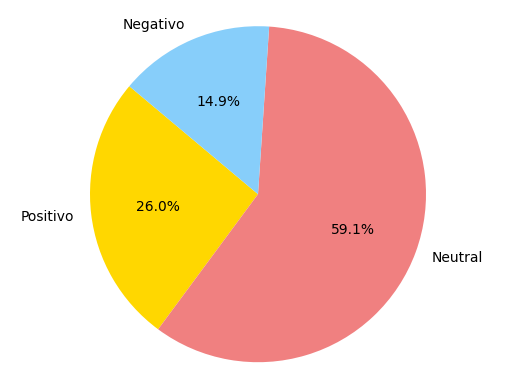

In [61]:
import pandas as pd
from textblob import TextBlob

# Carga de datos desde CSV
df= pd.read_csv('Avatar1.1.csv')

# Asegúrate de que tu CSV tenga una columna con textos. Aquí asumo que se llama 'texto'
sentimientos = {"positivo": 0, "neutral": 0, "negativo": 0}

for texto in df['Dialogos']:  # Cambia 'texto' por el nombre de tu columna si es diferente
    analisis = TextBlob(texto)
    polaridad = analisis.sentiment.polarity
    if polaridad > 0:
        sentimientos["positivo"] += 1
    elif polaridad == 0:
        sentimientos["neutral"] += 1
    else:
        sentimientos["negativo"] += 1

print(sentimientos)

import matplotlib.pyplot as plt

# Datos del análisis de sentimientos
labels = 'Positivo', 'Neutral', 'Negativo'
sizes = [sentimientos['positivo'], sentimientos['neutral'], sentimientos['negativo']]
colors = ['gold', 'lightcoral', 'lightskyblue']

# Creación de la gráfica de pastel
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

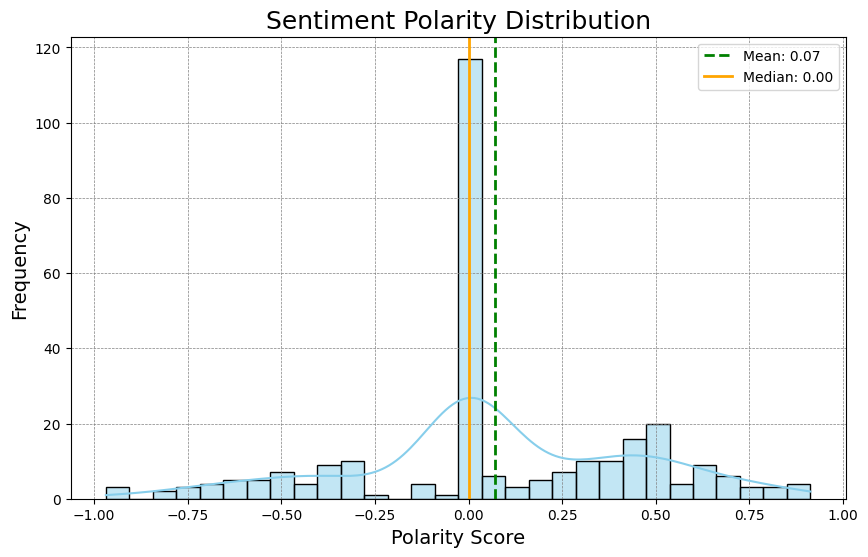

In [85]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Calculate the mean and median
mean_val = df['VADER_Polarity'].mean()
median_val = df['VADER_Polarity'].median()

# Plot the distribution with a KDE and increased bins
sns.histplot(df['VADER_Polarity'], bins=30, kde=True, color='skyblue')

# Add a vertical line for mean and median
plt.axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='orange', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

# Add title and labels with larger font sizes for better readability
plt.title('Sentiment Polarity Distribution', fontsize=18)
plt.xlabel('Polarity Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add legend to the plot
plt.legend()

# Add grid to the plot
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

In [63]:
from wordcloud import WordCloud
text = ' '.join(df.Dialogos)
text

"They can fix a spinal, if you?ve got\nthe money. But not on vet benefits,\nnot in this economy. The Bengal tiger, extinct for over a\ncentury, is making a comeback. These\ncloned tiger cubs at the Beijing Zoo\nare I became a Marine for the hardship.\nTo be hammered on the anvil of life.\nI told myself I could pass any test\na man can pass. If it ain?t rainin? we ain?t trainin Are you Jake Sully? Step off. You?re ruinin? my good\nmood. It?s about your brother. The strong prey on the weak. A guy\nwith a knife took all Tommy would\never be, for the paper in his\nwallet. Your brother represented a\nsignificant investment. We?d like to\ntalk to you about taking over his\ncontract. The egghead and the jarhead. Tommy\nwas the scientist, not me. He was\nthe one who wanted to get shot light\nyears out into space to find the\nanswers. We?re there, Sunshine. People, you have been in cryo for\nfive years, nine months and twenty\ntwo days. You will be hungry, you\nwill be weak. If you feel nausea,

In [86]:
wordcloud = WordCloud(width=1024, height=800, colormap='Blues', min_font_size=14).generate(text)


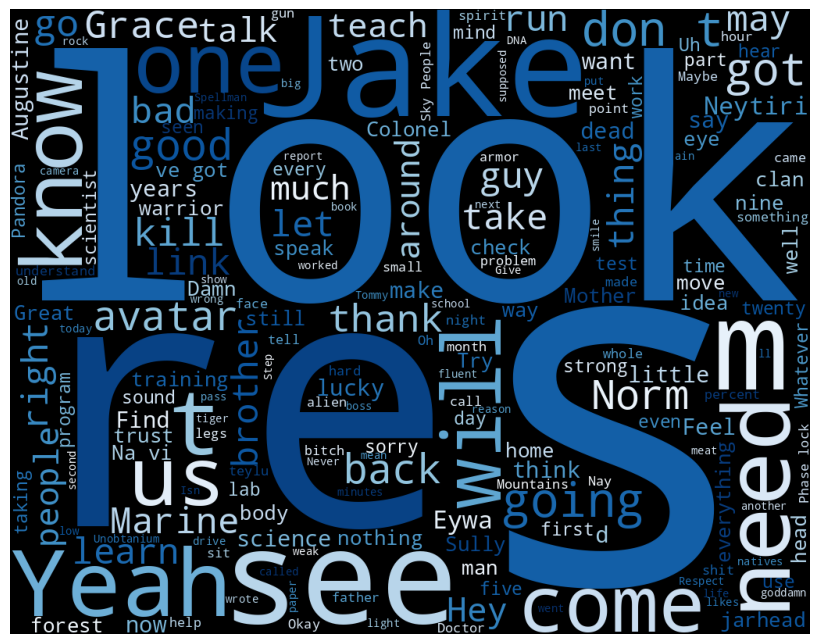

In [87]:

plt.figure(figsize= (8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

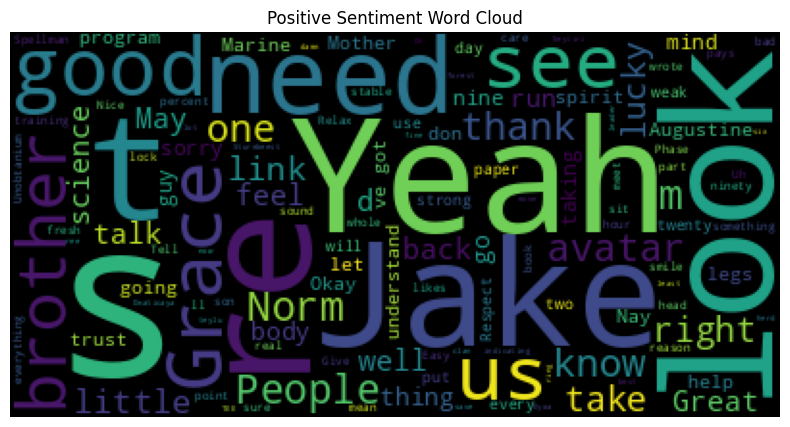

In [88]:
# Word Clouds for Positive and Negative Sentiments
positive_Dialogos = ' '.join(df[df['Sentiment'] == 'Positive']['Cleaned_text'])
negative_Dialogos = ' '.join(df[df['Sentiment'] == 'Negative']['Cleaned_text'])

plt.figure(figsize=(10, 5))
plt.imshow(WordCloud().generate(positive_Dialogos))
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()

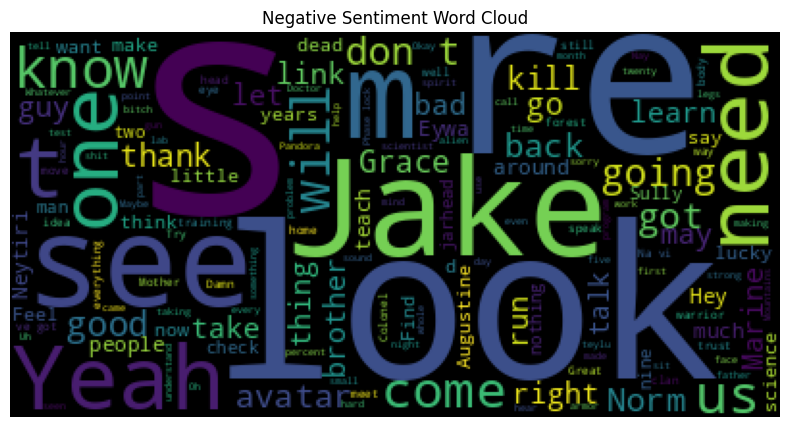

In [91]:
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud().generate(text))
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()

# 6.Deployment

1. Analysis of Sentiments and Extraction of Key Points
Sentiment Analysis: Apply NLP techniques to evaluate the polarity and subjectivity of comments.
Identifying Major Themes: Use techniques such as word frequency analysis or topic modeling algorithms to identify recurring themes.

2. Correlation with Box Office Success
Integration with Box Office Data: Combine sentiment analysis results with box office data to look for correlations.
Statistical Analysis: Perform statistical analysis to understand the relationship between public perception and box office success.

3. Visualization and Presentation of Results
Data visualization: Create charts and dashboards to visually represent findings.
Insights Presentation: Produce reports that summarize key insights, including how specific elements of films relate to their success.

4. Continuous Evaluation and Improvements
Feedback and Adjustments: Collect feedback and adjust your approach as necessary.
Regular Model Update: Keep your model updated with new data and trends.

5. Dissemination and Sharing of Findings
Share with Stakeholders: Present your findings to interested parties, such as producers, distributors and marketing teams.
Publication: Consider publishing your findings on blogs, industry magazines, or conferences.

#7.Conclusion

Main Results:

  Our analysis revealed a strong correlation between positive polarity in dialogue and its box office success. Movies with high positive sentiment scores tended to have higher revenues.

Key Popularity Factors: We identified that elements such as the quality of the script and the feelings of the characters were the most praised in the reviews of the most successful films.


Variability by Genre and Demographics: The analysis showed significant variations in the perception of films based on film genre and target demographic groups. For example, action and superhero movies were particularly positively received by younger viewers.

Importance of First Impression: The initial reception of a film, especially in the first few weeks after release, is critical to its box office success.

### Recommendations and Future Strategies

Based on our findings, we recommend that producers and distributors focus on developing marketing strategies that highlight the elements most appreciated by the target audience. Additionally, it is essential to stay abreast of current trends and adapt film narratives to resonate with contemporary viewers. Continuous monitoring of opinions on social networks and review platforms can provide valuable insights for future productions and promotional campaigns.